### Name: Mohammad Shayan Shabani
### StudentId: 400105069

# Librarires

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score as sklearn_silhouette_score

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [4]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        self.centroids = random.sample(list(X), self.n_clusters)
        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = self._calculate_centroids(X, clusters)
            if self._converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        clusters = []
        for x in X:
            distances = [self._euclidean_distance(x, centroid) for centroid in self.centroids]
            cluster = distances.index(min(distances))
            clusters.append(cluster)
        return clusters

    def _calculate_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = [X[j] for j in range(len(X)) if clusters[j] == i]
            if cluster_points:
                new_centroid = [sum(dim) / len(cluster_points) for dim in zip(*cluster_points)]
            else:
                new_centroid = random.choice(X)
            new_centroids.append(new_centroid)
        return new_centroids

    def _euclidean_distance(self, point1, point2):
        return sum((x - y) ** 2 for x, y in zip(point1, point2)) ** 0.5

    def _converged(self, centroids, new_centroids):
        distances = [self._euclidean_distance(c1, c2) for c1, c2 in zip(centroids, new_centroids)]
        return sum(distances) == 0

    def predict(self, X):
        clusters = self._assign_clusters(X)
        return clusters
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)
    
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(x_data)
labels = kmeans.predict(x_data)
np.info(np.array(labels))

class:  ndarray
shape:  (4000,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1c2f421a4c0
byteorder:  little
byteswap:  False
type: int32


# Use elbow method and silhouette method to choose optimal cluster numbers

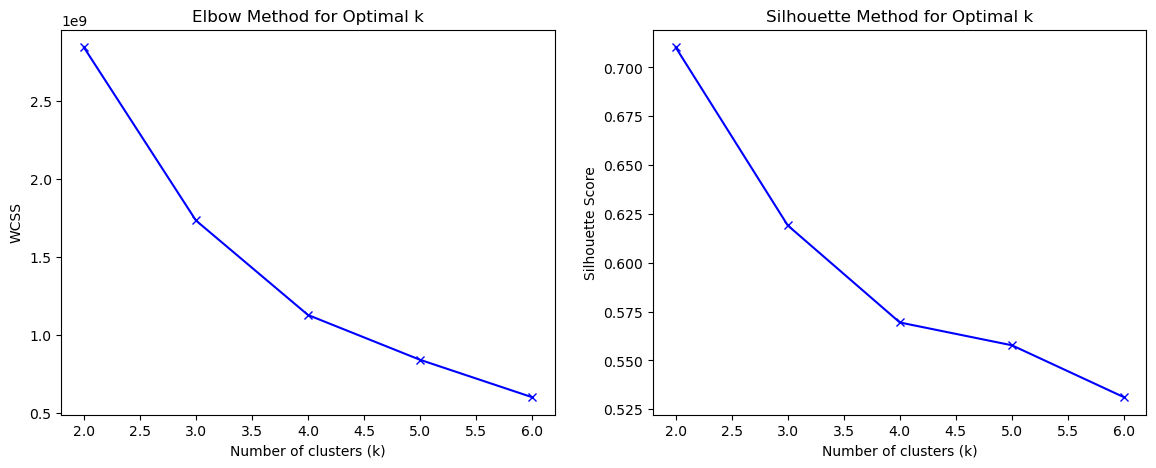

In [5]:
#TODO

def calculate_wcss(X, clusters, centroids):
    wcss = 0
    for i, point in enumerate(X):
        centroid = centroids[clusters[i]]
        wcss += sum((p - c) ** 2 for p, c in zip(point, centroid))
    return wcss

def calculate_silhouette_value(x, cluster, X, clusters):
    own_cluster_points = [X[i] for i in range(len(X)) if clusters[i] == cluster]
    other_cluster_points = [X[i] for i in range(len(X)) if clusters[i] != cluster]
    
    if len(own_cluster_points) > 1:
        a = sum([KMeans()._euclidean_distance(x, p) for p in own_cluster_points if not all(x == p)]) / (len(own_cluster_points) - 1)
    else:
        a = 0
    
    b = float('inf')
    for i in set(clusters):
        if i == cluster:
            continue
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        b = min(b, sum([KMeans()._euclidean_distance(x, p) for p in points]) / len(points))
    
    return (b - a) / max(a, b)


def silhouette_score(X, clusters):
    silhouette_values = [calculate_silhouette_value(X[i], clusters[i], X, clusters) for i in range(len(X))]
    return sum(silhouette_values) / len(silhouette_values)

def find_optimal_clusters(X, max_k):
    wcss = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        clusters = kmeans.fit_predict(X)
        centroids = kmeans.centroids
        
        wcss.append(calculate_wcss(X, clusters, centroids))
        
        silhouette_scores.append(silhouette_score(X, clusters))
    
    return wcss, silhouette_scores
    
max_k = 6
wcss, silhouette_scores = find_optimal_clusters(x_data, max_k)
k_range = range(2, max_k + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')

plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\clust

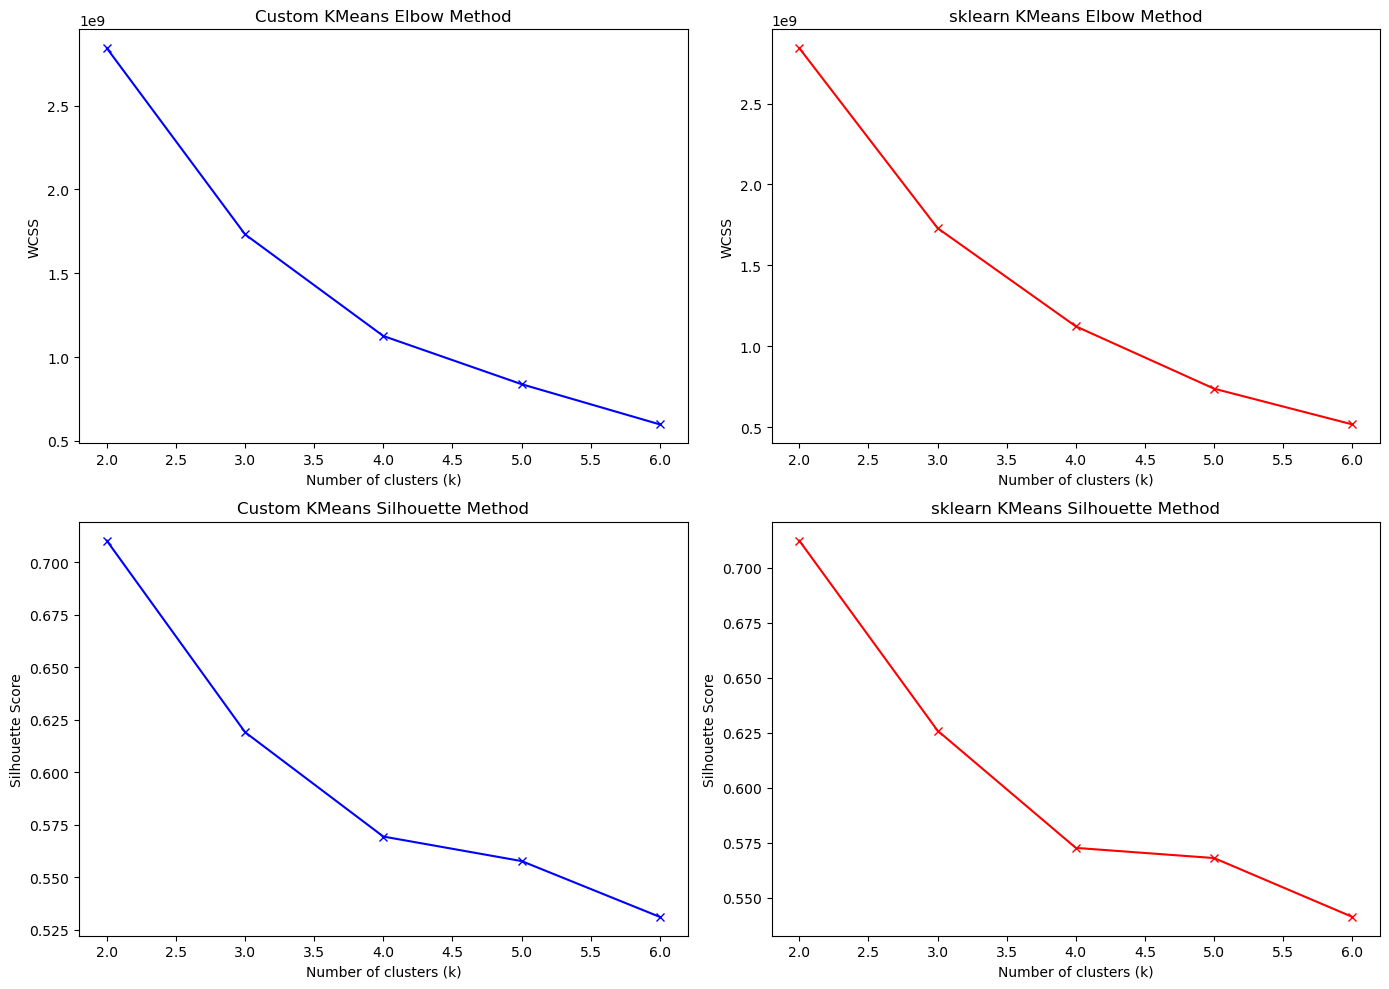

In [8]:
#TODO
def find_optimal_clusters_sklearn(X, max_k):
    wcss = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = SKLearnKMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)        
        silhouette_scores.append(sklearn_silhouette_score(X, clusters))
    return wcss, silhouette_scores

def plot_comparison(custom_wcss, custom_silhouette_scores, sklearn_wcss, sklearn_silhouette_scores, max_k):
    k_range = range(2, max_k + 1)

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.plot(k_range, custom_wcss, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Custom KMeans Elbow Method')

    plt.subplot(2, 2, 2)
    plt.plot(k_range, sklearn_wcss, 'rx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.title('sklearn KMeans Elbow Method')

    plt.subplot(2, 2, 3)
    plt.plot(k_range, custom_silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Custom KMeans Silhouette Method')

    plt.subplot(2, 2, 4)
    plt.plot(k_range, sklearn_silhouette_scores, 'rx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('sklearn KMeans Silhouette Method')

    plt.tight_layout()
    plt.show()

max_k = 6
custom_wcss, custom_silhouette_scores = find_optimal_clusters(x_data, max_k)
sklearn_wcss, sklearn_silhouette_scores = find_optimal_clusters_sklearn(x_data, max_k)
plot_comparison(custom_wcss, custom_silhouette_scores, sklearn_wcss, sklearn_silhouette_scores, max_k)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

These two methods seems to be exactly the same, the optimal no. of clusters is 4 in my opinion. As you see on the plots, after 4, there is no big change in WCSS. Silhouette score migh be maximum at a no. of clusters more than 6, but right now, it gives us a good score (bigger than 0.5) at k = 4

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

Silhouette method is pretty straight forward, but our data here is huge and it needs much time to compute for higher no. of clusters, so I can't decide with silhouette score right now, I used Elbow